In [17]:
import numpy as np
import pandas as pd


In [18]:
crop=pd.read_csv('Crop_recommendation.csv')
print("Dataset loaded successfully!")


Dataset loaded successfully!


In [19]:
crop.head(10)

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [20]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [21]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [22]:
crop.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [23]:
crop.duplicated().sum()

np.int64(0)

/tmp/ipython-input-155753628.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='label', data=crop, order=crop['label'].value_counts().index, palette='viridis')


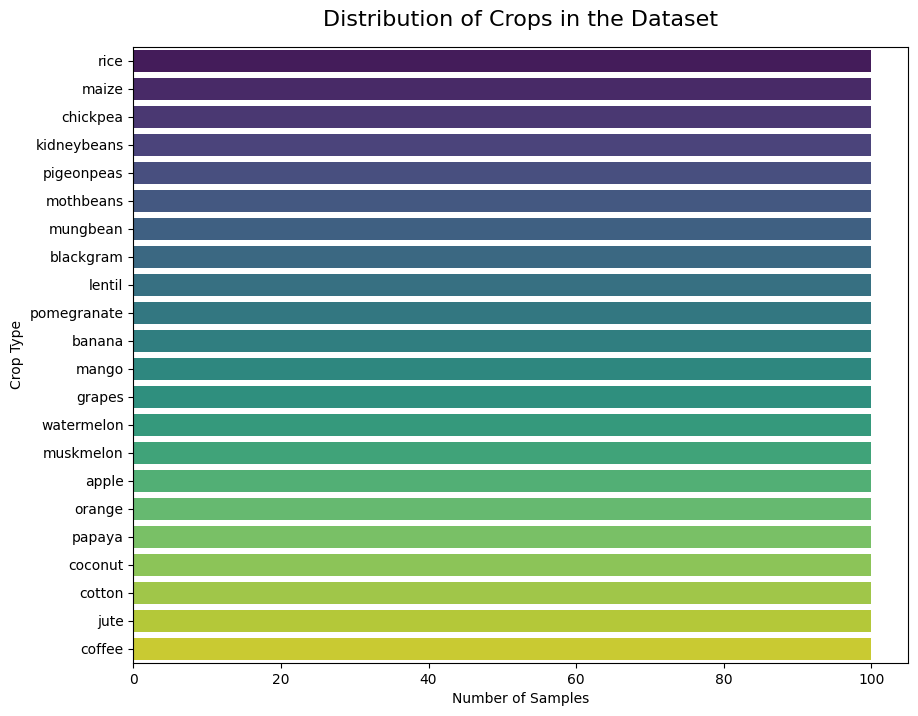

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,8))
sns.countplot(y='label', data=crop, order=crop['label'].value_counts().index, palette='viridis')
plt.title("Distribution of Crops in the Dataset", fontsize=16, pad=15)
plt.xlabel("Number of Samples")
plt.ylabel("Crop Type")
plt.show()


<Figure size 1200x600 with 0 Axes>

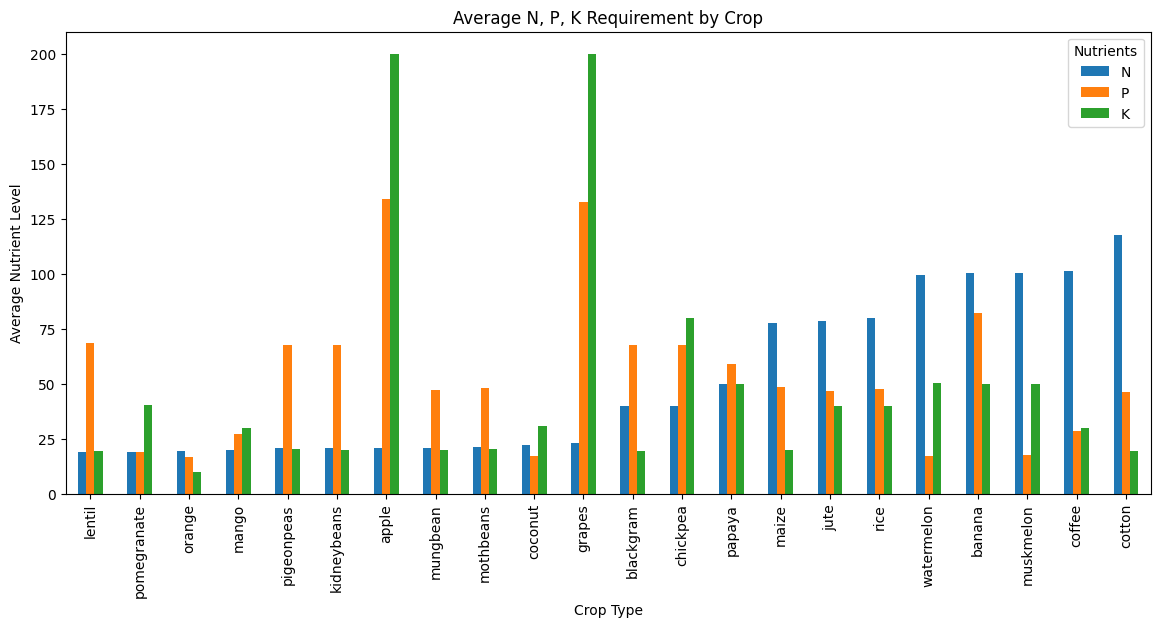

In [29]:
plt.figure(figsize=(12,6))
avg_nutrients = crop.groupby('label')[['N','P','K']].mean().sort_values('N')
avg_nutrients.plot(kind='bar', figsize=(14,6))
plt.title("Average N, P, K Requirement by Crop")
plt.ylabel("Average Nutrient Level")
plt.xlabel("Crop Type")
plt.xticks(rotation=90)
plt.legend(title="Nutrients")
plt.show()
#This tells you which crops need more Nitrogen (N), Phosphorus (P), or Potassium (K).

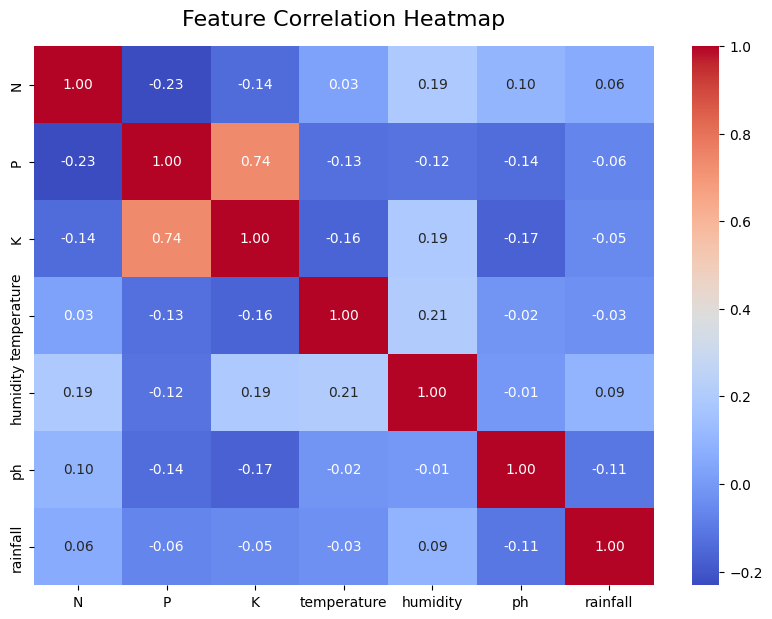

In [32]:
plt.figure(figsize=(10,7))
sns.heatmap(crop.drop(columns='label').corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap", fontsize=16, pad=15)
plt.show()
